<a href="https://colab.research.google.com/github/cu-applied-math/SciML-Class/blob/main/Labs/lab13_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad, cumulative_trapezoid, cumulative_simpson
from scipy.stats import gaussian_kde
from statsmodels.graphics.tsaplots import plot_acf

# Lab 13: Markov Chain Monte Carlo

This is the end of the semester, so the lab has less "hand-holding" than before!

Lab created by Stephen Becker, Nov 2024 for SciML class at University of Colorado Boulder

## Part 1: Metropolis algorithm
You're given the function `q` below which is proportional to a probability `p` that we'd like to sample from.  
- Code a **Metropolis** sampling algorithm
- Pick a jump function (to propose new samples)
- Run the code using your jump function and the provided `q` sampling function, and generate a lot of samples
- Plot a histogram of these samples and make some comments

## Part 2: nicer results
- We plotted the histogram before, but this has a resolution problem -- if we have a lot of bins, each bin has poor statistics; but if we have a few bins, we don't have much resolution.
- To supplement the histogram, plot a kernel density estimate of the MCMC samples. This also has a bias-accuracy tradeoff (due to the bandwidth selection), but it still gives some nice information that you don't get just from a histogram

## Part 3: independence
- Are the samples from our MCMC sampler independent? Do some computation to support your answer
  - I suggest looking at the autocorrelation function (ACF)
  - It's generally not possible to prove that samples **are** independent, but we can be quite certain sometimes that various samples are **not** independent.  In particular, independent samples are uncorrelated (though not necessarily vice-versa), so if you find correlations that you believe are not spurious, then the samples cannot be independent


## Part 4: if you have time...
- Numerically integrate $q$ using `scipy.integrate.cumulative_simpson` to get the CDF and then do [inverse CDF sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling). This is only really practical in 1D.
  - [`np.interp`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) may be helpful
  - Plot a histogram of your samples using the inverse CDF sampling

- you could record how many failed steps are in the Metropolis algorithm, since that affects how efficient it is
- you could also explore the effect of different jump functions on the quality of your Metropolis algorithm

## Helpful references
- on [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo)
  - Ch. 14 of Christopher Bishop's [Deep Learning](https://link.springer.com/book/10.1007/978-3-031-45468-4) (free PDF via SpringerLink)
  - Lecture notes on [ch 15 Sampling Methds](https://www.ece.virginia.edu/~ffh8x/docs/teaching/esl/15-Sampling-Methods.pdf) by Farzad Farnoud (U. of Virginia), part of [Statistical Learning and Graphical Models](https://www.ece.virginia.edu/~ffh8x/esl.html) class taught 2021 (see ch 5 [Linear Regression](https://www.ece.virginia.edu/~ffh8x/docs/teaching/esl/05-Linear-Regression.pdf) for "Bayesian Linear Regression" and an example of a non-informative prior that sets up a case where one has an unnormalized pdf).
  - Another set of lectures notes, these by Eric Xing at CMU, scribed 2014, [Approximate Inference: Markov Chain Monte Carlo](https://www.cs.cmu.edu/~epxing/Class/10708-14/scribe_notes/scribe_note_lecture17.pdf)
  - We're doing the "Metropolis" algorithm which uses a symmetric jump function, and can be seen as a special case of (the better-known) [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm
  - For efficient, state-of-the-art MCMC with all the bells-and-whistles, in an interface that prevents you from making silly mistakes, try [PyMC](https://www.pymc.io/welcome.html). However, that's overkill for this lab, as we want to explore the very basics and get our hands dirty.
- Documentation for functions
  - use [`scipy.stats.gaussian_kde`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) for the [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)
  - use [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) for numerical integration (quadrature)
  - use [`statsmodels.graphics.tsaplots.plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html) to plot the [ACF](https://en.wikipedia.org/wiki/Autocorrelation)

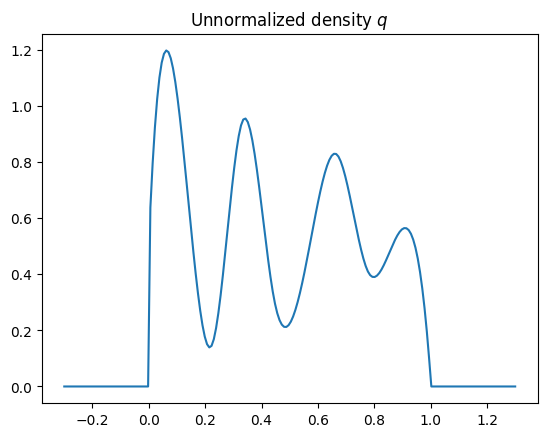

In [2]:
# Pick an arbitrary, simple 1D function q
#   (that has some wiggles to it, to make it interesting)
# We'll have it supported on [0,1]. In case the sampler proposes an estimate
#   x that is outside the support, we just say that this proposal has 0 probability,
#   i.e., we just define q(x) = 0 if x is outside of [0,1]
rng = np.random.default_rng(1)

def out_of_bounds(f,a=0,b=1):
    """ this limits a function to a domain (a,b) [i.e., zero outside] """
    def g(x):
        """ input x might be vectorized """
        out = f(x)
        out[ x < a ] = 0
        out[ x > b ] = 0
        return out
    return g

# We pick a few points and interpolate between them with a cubic spline to give us
#   an interesting (but smooth) function q(x)
q = out_of_bounds( CubicSpline( np.linspace(0,1,num=10), rng.uniform(0,1,size=10) ) )

xgrid = np.linspace(-.3,1.3,num=200)
ygrid = q(xgrid)
plt.plot(xgrid,ygrid)
plt.title('Unnormalized density $q$')
plt.show()

## Part 1

Implement Metropolis MCMC

Without doing anything fancy (and no jax/jit), it takes about 3 seconds on colab for my version generate 100,000 samples

In [10]:
# todo

## Part 2: nicer plots using KDE
- We plotted the histogram before, but this has a resolution problem -- if we have a lot of bins, each bin has poor statistics; but if we have a few bins, we don't have much resolution.
- To supplement the histogram, plot a kernel density estimate of the MCMC samples. This also has a bias-accuracy tradeoff (due to the bandwidth selection), but it still gives some nice information that you don't get just from a histogram

**Helpful Documentation**
  - use [`scipy.stats.gaussian_kde`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) for the [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

In [11]:
# todo

## Part 3: independent samples?
- Are the samples from our MCMC sampler independent? Do some computation to support your answer
  - I suggest looking at the autocorrelation function (ACF)
  - It's generally not possible to prove that samples **are** independent, but we can be quite certain sometimes that various samples are **not** independent.  In particular, independent samples are uncorrelated (though not necessarily vice-versa), so if you find correlations that you believe are not spurious, then the samples cannot be independent

**Helpful Documentation**
  - use [`statsmodels.graphics.tsaplots.plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html) to plot the [ACF](https://en.wikipedia.org/wiki/Autocorrelation)


In [12]:
# todo

## Part 4: going farther

- Numerically integrate $q$ using `scipy.integrate.cumulative_simpson` to get the CDF and then do [inverse CDF sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling). This is only really practical in 1D.
  - [`np.interp`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) may be helpful
  - Plot a histogram of your samples using the inverse CDF sampling

- you could record how many failed steps are in the Metropolis algorithm, since that affects how efficient it is
- you could also explore the effect of different jump functions on the quality of your Metropolis algorithm

**Helpful Documentation**

  - use [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) for numerical integration (quadrature)


In [ ]:
# todo